#  How to use the dataset

Lung cancer is the leading cause of cancer death worldwide, accounting for 1.59 million deaths in 2018. 

The majority of lung cancer cases are attributed to smoking, but exposure to air pollution is also a risk factor. A new study has found that air pollution may be linked to an increased risk of lung cancer, even in nonsmokers.

The study, which was published in the journal Nature Medicine, looked at data from over 462,000 people in China who were followed for an average of six years. 

The participants were divided into two groups: those who lived in areas with high levels of air pollution and those who lived in areas with low levels of air pollution.

The researchers found that the people in the high-pollution group were more likely to develop lung cancer than those in the low-pollution group. 
They also found that the risk was higher in nonsmokers than smokers and that the risk increased with age.

While this study does not prove that air pollution causes lung cancer, it does suggest that there may be a link between the two. More research is needed to confirm these findings and to determine what effect different types and levels of air pollution may have on lung cancer risk. 

# Research Goals

1. Predict the **likelihood** of a patient developing lung cancer.
   
2. Identify **risk factors** for lung cancer.

3. Determinate **the most effective treatment** for a patient with lung cancer. 

# Data Cleaning & Exploration 

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as plt 

%matplotlib inline

In [2]:
os.chdir('/kaggle/')
os.listdir('/kaggle/input/lung-cancer-data') 

['cancer patient data sets.csv']

In [3]:
lung_cancer = pd.read_csv('/kaggle/input/lung-cancer-data/cancer patient data sets.csv') 

lung_cancer.shape

(1000, 26)

In [4]:
lung_cancer.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [5]:
lung_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [6]:
lung_cancer.head(10) 

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


In [7]:
lung_cancer.describe()  

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [8]:
categorical_var = lung_cancer.dtypes[lung_cancer.dtypes == 'object'].index 
lung_cancer[categorical_var].describe() 

,Patient Id,Level
count,1000,1000
unique,1000,3
top,P1,High
freq,1,365


In [9]:
lung_cancer.isnull().sum() 

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [10]:
del lung_cancer['Patient Id'] 

In [11]:
new_gender = pd.Categorical(lung_cancer["Gender"]) 
new_gender = new_gender.rename_categories(['male', 'female']) 
new_gender.describe() 

,counts,freqs
categories,,
male,598,0.598
female,402,0.402


In [12]:
lung_cancer['Gender'] = new_gender 
lung_cancer['Gender'].describe()

count     1000
unique       2
top       male
freq       598
Name: Gender, dtype: object

# Exploratory Data Analysis (EDA) 

In [13]:
lung_cancer["Level"].value_counts() 

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

<Axes: xlabel='Level', ylabel='Air Pollution'>

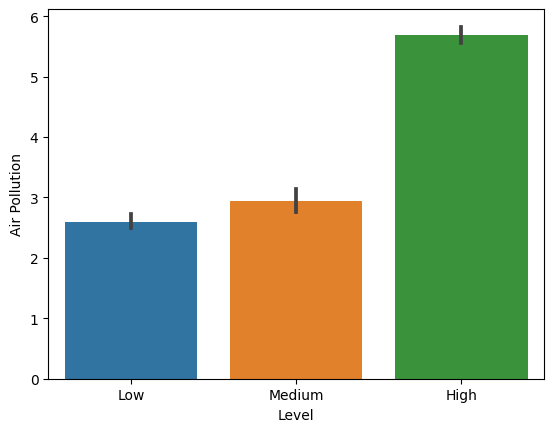

In [14]:
sns.barplot(x = "Level", y = "Air Pollution", data = lung_cancer )

<Axes: xlabel='Level', ylabel='Smoking'>

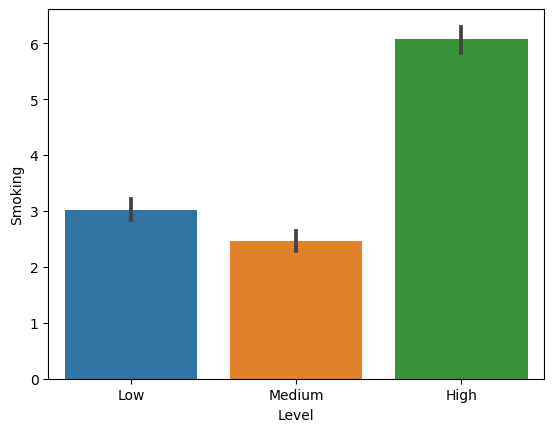

In [15]:
sns.barplot(x = 'Level', y = 'Smoking', data = lung_cancer)

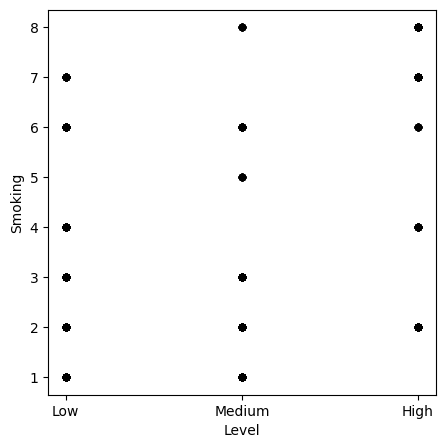

In [16]:
lung_cancer.plot(kind="scatter",
           x="Level",
           y="Smoking",
           figsize=(5, 5),
           color="black");